# TP Programming with Keras - XOR problem

In this session, we build a neural network to solve the classification problem in the XOR situation, by using the Tensorflow/Keras libraries.

Maintenant, nous allons produire un réseau de neurones pour effectuer une classification sur le cas XOR, en utilisant les bibliothèques tensorflow/keras.

In this practice session, some cells must be filled according to the instructions. They are identified by the word **Exercise**. You will perform the **Verifications** yourselves in most cases, by watching if the algorithm correctly works and converges.

Below we import the required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras


## Data definition

We focus on the XOR problem ("exclusive or"). Let's take vectors with two dimensions. If both coordinates of the vector have the same sign, we will assign the vector to class 1, and 0 if the coordinates have opposite signs. As exercise, you can make a drawing of this situation. You can understand that a linear separator will not be able to separate the two classes. We will build a neural network to solve this problem. In the following cell, I build a database.

Run the following cell to create the data. Do not hesitate to display a visualization.

In [2]:
#DO NOT CHANGE

N_train = 200

X_train = 2*np.random.rand(N_train,2) - 1

Y_train = (np.sign(X_train[:,0]) == np.sign(X_train[:,1]))*1

Y_train = np.reshape(Y_train,(N_train,1))

N_test = 100

X_test = 2*np.random.rand(N_test,2) - 1

Y_test = (np.sign(X_test[:,0]) == np.sign(X_test[:,1]))*1

Y_test = np.reshape(Y_test,(N_test,1))

## Keras model

### Model creation

**Exercise**: Create a Keras model that you will call "my_model" with the following architecture: 3 Dense (fully-connected) layers, with 5, 5 and 1 neurons respectively. The first two layers must have a ReLU activation function and the last layer must have a sigmoid activation function.

**Hints**:
- Initialize the model with keras.Sequential
- Add layers by using my_model.add(LAYER)
- You will find the layers by calling keras.layers.Dense.
- For the first layer, give the input shape by using the keyword "input_shape": in our case, the shape is (2,); keep the coma even if it seems useless (otherwise, it can create errors, depending on the Keras version).

In [ ]:

#COMPLETE WITH THE STRUCTURE DEFINED IN THE INSTRUCTION

model = keras.Sequential()

model.add(keras.layers.Input(shape=(2,))) # Input layer with 2 features to be trained, 

model.add(keras.layers.Dense(5, activation='relu'))
model.add(keras.layers.Dense(5, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

**Exercise**: Display your architecture by calling my_model.summary()

In [7]:
#TO BE FILLED

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

### Model compilation

**Exercise**: You must compile the model, by indicating the loss function to use, the different metrics to be monitored, and the optimizer you want to use (with the associated learning rate and optionally other hyperparameters depending on the optimizer).

**Hints**:
- First define the optimizer in the variable "opt". Use Adam optimizer (keras.optimizers.Adam), and use a learning rate (keyword lr) of 0.01.
- Then use my_model.compile and add the following arguments:
    - the optimizer with the keyword "optimizer" and give the variable opt that you previously created
    - the loss function with the keyword "loss". We use the binary cross-entropy loss (string "binary_crossentropy")
    - the metric with the keyword "metrics". You must provide a list that contains the relevant metrics to monitor. In our case, we use only one metric, "binary_accuracy", that corresponds to the rate of correct anwers (with a default decision threshold of 0.5). You can watch the evolution of the metric during the training phase.

In [8]:
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['binary_accuracy'])



## Training

**Exercise**: We must run the training!

**Hints** :
- Use model.fit and give as input:
    - First the training input data X_train
    - Then the expected output Y_train
    - The number of epochs with the keyword "epochs". A hundred of epochs should be enough.
- Store the learning information in a variable "learning" (learning = model.fit(...)), this is useful to recover information on the learning (loss or metric evolution for instance)

In [9]:
learning = model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_data=(X_test, Y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - binary_accuracy: 0.4248 - loss: 0.6975 - val_binary_accuracy: 0.4700 - val_loss: 0.6872
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.5766 - loss: 0.6833 - val_binary_accuracy: 0.7100 - val_loss: 0.6769
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.6817 - loss: 0.6661 - val_binary_accuracy: 0.7400 - val_loss: 0.6561
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.7914 - loss: 0.6413 - val_binary_accuracy: 0.8300 - val_loss: 0.6225
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.7928 - loss: 0.6026 - val_binary_accuracy: 0.9200 - val_loss: 0.5655
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8569 - loss: 0.5335 - val_binary_accuracy: 0.9100 - val_loss: 0.5025
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8840 - loss: 0.5133 - val_binary_accuracy: 0.8600 - val_loss: 0.4464
Epoch 8/100


**Verification**: The loss function should decrease and the accuracy should increase.

**Exercise**: Complete the following code to draw the evolution of the loss and of the metric. You can find the loss function values by calling learning.history["loss"] and the accuracy by calling learning.history["binary_accuracy"].

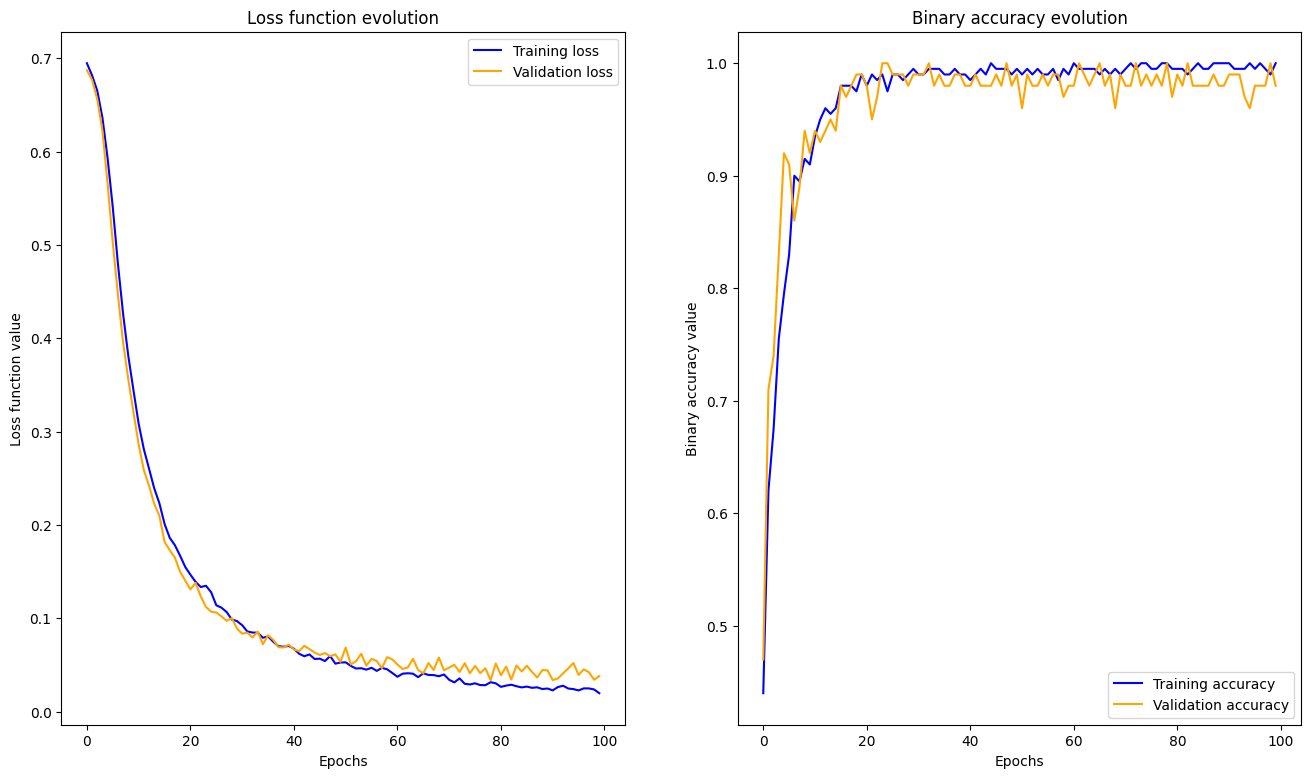

In [12]:
loss_evolution = learning.history['loss']
val_loss_evolution = learning.history['val_loss']
acc_evolution = learning.history['binary_accuracy']
val_acc_evolution = learning.history['val_binary_accuracy']

plt.figure(figsize = (16,9))
plt.subplot(121)
plt.plot(loss_evolution, color='blue', label='Training loss')
plt.plot(val_loss_evolution, color='orange', label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss function value")
plt.title("Loss function evolution")
plt.legend()


plt.subplot(122)
plt.plot(acc_evolution, color='blue', label='Training accuracy')
plt.plot(val_acc_evolution, color='orange', label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Binary accuracy value")
plt.title("Binary accuracy evolution")
plt.legend()
plt.show()


You can think that we could have kept on training. The loss function can seem to be able to decrease. I can invite you to run the training again, with many more epochs (1000 or more), and you can watch the effect on the training accuracy and the testing accuracy.

In [13]:
new_learning = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_test, Y_test))


Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 1.0000 - loss: 0.0183 - val_binary_accuracy: 0.9800 - val_loss: 0.0379
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 1.0000 - loss: 0.0214 - val_binary_accuracy: 0.9800 - val_loss: 0.0362
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 1.0000 - loss: 0.0200 - val_binary_accuracy: 1.0000 - val_loss: 0.0329
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 1.0000 - loss: 0.0192 - val_binary_accuracy: 0.9800 - val_loss: 0.0345
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 1.0000 - loss: 0.0230 - val_binary_accuracy: 0.9800 - val_loss: 0.0396
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 1.0000 - loss: 0.0214 - val_binary_accuracy: 1.0000 - val_loss: 0.0296
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.9984 - loss: 0.0174 - val_binary_accuracy: 0.9800 - val_loss: 0.0463
Epoch 

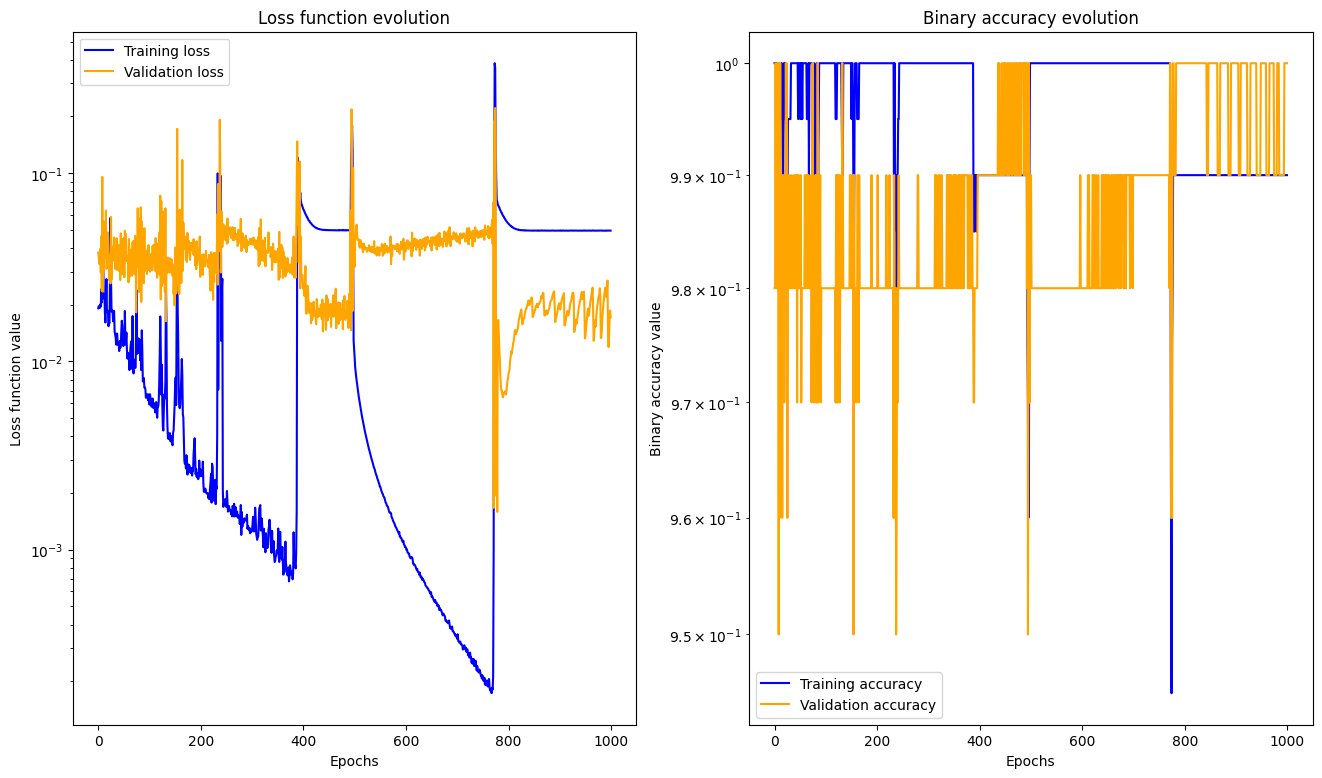

In [18]:
NEW_loss_evolution = new_learning.history['loss']
NEW_val_loss_evolution = new_learning.history['val_loss']
NEW_acc_evolution = new_learning.history['binary_accuracy']
NEW_val_acc_evolution = new_learning.history['val_binary_accuracy'] 

plt.figure(figsize = (16,9))
plt.subplot(121)
plt.plot(NEW_loss_evolution, color='blue', label='Training loss')
plt.plot(NEW_val_loss_evolution, color='orange', label='Validation loss')
plt.semilogy()
plt.xlabel("Epochs")
plt.ylabel("Loss function value")
plt.title("Loss function evolution")
plt.legend()    

plt.subplot(122)
plt.plot(NEW_acc_evolution, color='blue', label='Training accuracy')
plt.plot(NEW_val_acc_evolution, color='orange', label='Validation accuracy')
plt.semilogy()
plt.xlabel("Epochs")
plt.ylabel("Binary accuracy value")
plt.title("Binary accuracy evolution")
plt.legend()
plt.show()

## Predictions with your model

In [17]:
learning = model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_data=(X_test, Y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.9848 - loss: 0.0691 - val_binary_accuracy: 0.9900 - val_loss: 0.0192
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.9905 - loss: 0.0479 - val_binary_accuracy: 1.0000 - val_loss: 0.0161
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.9911 - loss: 0.0461 - val_binary_accuracy: 1.0000 - val_loss: 0.0125
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.9801 - loss: 0.0891 - val_binary_accuracy: 1.0000 - val_loss: 0.0111
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.9749 - loss: 0.1090 - val_binary_accuracy: 1.0000 - val_loss: 0.0134
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.9714 - loss: 0.1184 - val_binary_accuracy: 0.9700 - val_loss: 0.1168
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.9512 - loss: 0.1671 - val_binary_accuracy: 0.9500 - val_loss: 0.2183
Epoch 8/100
2

**Exercise**: Now, we can perform predictions on the test set. You can just use my_model.predict and apply this function on the test set X_test. Store this prediction in a variable Y_pred_test.

In [19]:
Y_pred_test = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


Find below the accuracy on the test set and on the train set: we use a decision threshold of 0.5; if the prediction is below 0.5, we associate the class 1, otherwise, we associate the class 0. We count the number of correct answers and we compute the ratio according to the number of examples.

In [20]:
print("Accuracy on test set: " + str(np.sum((Y_pred_test > 0.5) == Y_test)/N_test))

Accuracy on test set: 0.98


You can visualize your predictions on a 2D-square below!

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


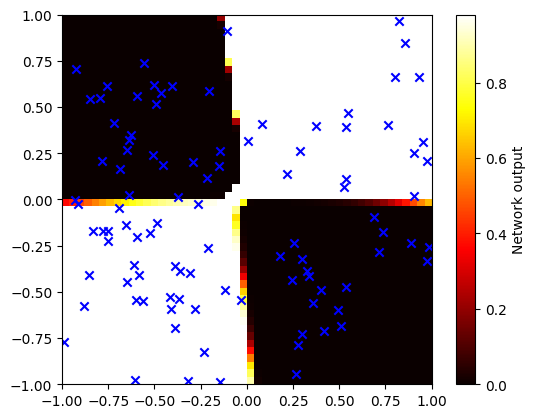

In [22]:
grid = np.meshgrid(np.linspace(-1.,1.,50),np.linspace(-1,1,50))

X_test_new = np.array([grid[0].flatten(),grid[1].flatten()])

Y_pred_new = model.predict(X_test_new.T)

maps = plt.imshow((Y_pred_new.reshape(grid[0].shape[0],grid[0].shape[1])),extent = (-1,1,-1,1),cmap = "hot",origin = "lower")
plt.scatter(X_test[:,0],X_test[:,1],color = "blue",marker = "x")
plt.colorbar(maps, label = "Network output")